In [1]:
# pylint: disable=invalid-name

In [2]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
import cyberbattle.agents.baseline.agent_drqn as drqn
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Papermill notebook parameters
gymid = "CyberBattleChain-v0"
env_size = 10
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
plots_dir = "output/plots"

In [5]:
# Parameters
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 100
training_episode_count = 3
eval_episode_count = 5
maximum_node_count = 12
maximum_total_credentials = 10
plots_dir = "notebooks/output/toyctf_rulebased/plots"


In [6]:
os.makedirs(plots_dir, exist_ok=True)

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast

gym_env = cast(CyberBattleEnv, _gym_env.unwrapped)
assert isinstance(gym_env, CyberBattleEnv), f"Expected CyberBattleEnv, got {type(gym_env)}"

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

In [7]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, t, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=100,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:   33.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:   33.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward:   47.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward:   47.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:   97.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:   97.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  106.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 48|reward:  106.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 64|reward:  106.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  106.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 88|reward:  106.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 94|reward:  106.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 97|reward:  106.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward:  106.0|last_reward_at:   48|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/15 (0.06)
    explore-remote: 4/68 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/11 (0.08)
  exploit deflected to exploration: 4
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8921, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:   44.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:   44.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:   58.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:   58.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  108.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  108.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:  117.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:  117.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  117.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 68|reward:  117.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 73|reward:  123.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 73|reward:  123.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  123.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 2|Iteration 92|reward:  123.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 2|Iteration 100|reward:  123.0|last_reward_at:   73|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/20 (0.05)
    explore-remote: 6/61 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/11 (0.08)
  exploit deflected to exploration: 5
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8842, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:   36.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:   86.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:   86.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:   92.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:   92.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:   92.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:   92.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:   92.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 68|reward:   92.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  103.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  103.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 84|reward:  103.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 100|reward:  103.0|last_reward_at:   76|Elapsed Time: 0:00:00||

  Episode 3 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/17 (0.06)
    explore-remote: 4/77 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 15
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.8764, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:   33.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:   42.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:   42.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 49|reward:   56.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 49|reward:   56.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward:  106.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward:  106.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  117.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  117.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  131.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  131.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 89|reward:  181.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 89|reward:  181.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 4|Iteration 98|reward:  187.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 4|Iteration 98|reward:  187.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 4|Iteration 100|reward:  187.0|last_reward_at:   98|Elapsed Time: 0:00:00||

  Episode 4 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/19 (0.05)
    explore-remote: 7/67 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/4 (0.33)
  exploit deflected to exploration: 3
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.8687, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 54|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 56|reward:   22.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:   22.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 5|Iteration 77|reward:   36.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 5|Iteration 77|reward:   36.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 5|Iteration 80|reward:   86.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 5|Iteration 80|reward:   86.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 5|Iteration 92|reward:   86.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 5|Iteration 100|reward:   86.0|last_reward_at:   80|Elapsed Time: 0:00:00||

  Episode 5 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/26 (0.04)
    explore-remote: 2/70 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 11
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.8611, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 45|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 52|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 58|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 58|reward:   42.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 6|Iteration 87|reward:   42.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 6|Iteration 100|reward:   42.0|last_reward_at:   58|Elapsed Time: 0:00:00||

  Episode 6 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/20 (0.05)
    explore-remote: 3/62 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/14 (0.00)
  exploit deflected to exploration: 1
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.8535, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 30|reward:   42.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 30|reward:   42.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:   53.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 56|reward:   53.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 57|reward:   67.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 57|reward:   67.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 7|Iteration 88|reward:   67.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 7|Iteration 97|reward:   73.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 7|Iteration 97|reward:   73.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 7|Iteration 98|reward:  123.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 7|Iteration 98|reward:  123.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 7|Iteration 100|reward:  123.0|last_reward_at:   98|Elapsed Time: 0:00:00||

  Episode 7 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/23 (0.04)
    explore-remote: 6/65 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/4 (0.20)
  exploit deflected to exploration: 2
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.8460, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 42|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 42|reward:   33.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:   44.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:   44.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 64|reward:   44.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 73|reward:   58.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 8|Iteration 73|reward:   58.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 8|Iteration 75|reward:   64.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 8|Iteration 75|reward:   64.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 8|Iteration 86|reward:  114.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 8|Iteration 86|reward:  114.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 8|Iteration 100|reward:  114.0|last_reward_at:   86|Elapsed Time: 0:00:00||

  Episode 8 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/21 (0.05)
    explore-remote: 5/72 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 8
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.8386, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:   22.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:   31.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:   42.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:   42.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 66|reward:   42.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 69|reward:   56.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 69|reward:   56.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 9|Iteration 71|reward:  106.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 9|Iteration 71|reward:  106.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 9|Iteration 98|reward:  106.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 9|Iteration 100|reward:  106.0|last_reward_at:   71|Elapsed Time: 0:00:00||

  Episode 9 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/19 (0.05)
    explore-remote: 4/62 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/13 (0.07)
  exploit deflected to exploration: 4
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.8312, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"


Episode 10|Iteration 8|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 10|Iteration 10|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 10|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
GitHubProject,discovered,NaN,None,[CredScanGitHistory]


Episode 10|Iteration 11|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 10|Iteration 22|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 10|Iteration 28|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 10|Iteration 48|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 10|Iteration 48|reward:   33.0|last_reward_at:   48|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Website.Directory,discovered,NaN,None,"[NavigateWebDirectoryFurther, NavigateWebDirec..."


Episode 10|Iteration 49|reward:   33.0|last_reward_at:   48|Elapsed Time: 0:00:02||

Episode 10|Iteration 55|reward:   44.0|last_reward_at:   48|Elapsed Time: 0:00:02||

Episode 10|Iteration 55|reward:   44.0|last_reward_at:   55|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Website.Directory,discovered,NaN,None,"[NavigateWebDirectoryFurther, NavigateWebDirec..."
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]


Episode 10|Iteration 56|reward:   44.0|last_reward_at:   55|Elapsed Time: 0:00:03||

Episode 10|Iteration 67|reward:   53.0|last_reward_at:   55|Elapsed Time: 0:00:03||

Episode 10|Iteration 67|reward:   53.0|last_reward_at:   67|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Website.Directory,discovered,NaN,None,"[NavigateWebDirectoryFurther, NavigateWebDirec..."
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]


Episode 10|Iteration 68|reward:   53.0|last_reward_at:   67|Elapsed Time: 0:00:03||

Episode 10|Iteration 78|reward:   53.0|last_reward_at:   67|Elapsed Time: 0:00:03||

Episode 10|Iteration 80|reward:   67.0|last_reward_at:   67|Elapsed Time: 0:00:03||

Episode 10|Iteration 80|reward:   67.0|last_reward_at:   80|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Website.Directory,discovered,NaN,None,"[NavigateWebDirectoryFurther, NavigateWebDirec..."
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]
AzureResourceManager,discovered,NaN,None,[ListAzureResources]


Episode 10|Iteration 81|reward:   67.0|last_reward_at:   80|Elapsed Time: 0:00:04||

Episode 10|Iteration 82|reward:  117.0|last_reward_at:   80|Elapsed Time: 0:00:04||

Episode 10|Iteration 82|reward:  117.0|last_reward_at:   82|Elapsed Time: 0:00:04||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
AzureResourceManager,owned,[CTFFLAG:LeakedCustomerData2],[],[ListAzureResources]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Website.Directory,discovered,NaN,None,"[NavigateWebDirectoryFurther, NavigateWebDirec..."
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]


Episode 10|Iteration 83|reward:  117.0|last_reward_at:   82|Elapsed Time: 0:00:05||

Episode 10|Iteration 95|reward:  117.0|last_reward_at:   82|Elapsed Time: 0:00:05||

Episode 10|Iteration 100|reward:  117.0|last_reward_at:   82|Elapsed Time: 0:00:05||

  Episode 10 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/23 (0.04)
    explore-remote: 5/66 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/4 (0.20)
  exploit deflected to exploration: 9
simulation ended


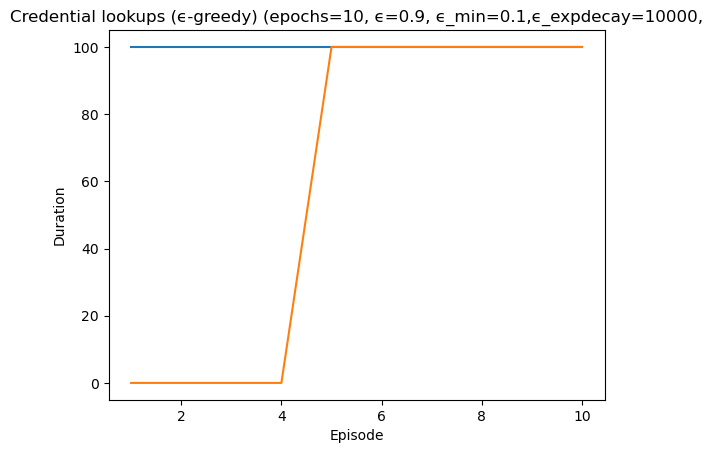

In [8]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache

credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render_last_episode_rewards_to=os.path.join(plots_dir, f"credlookup-{gymid}"),
    title="Credential lookups (ϵ-greedy)",
)

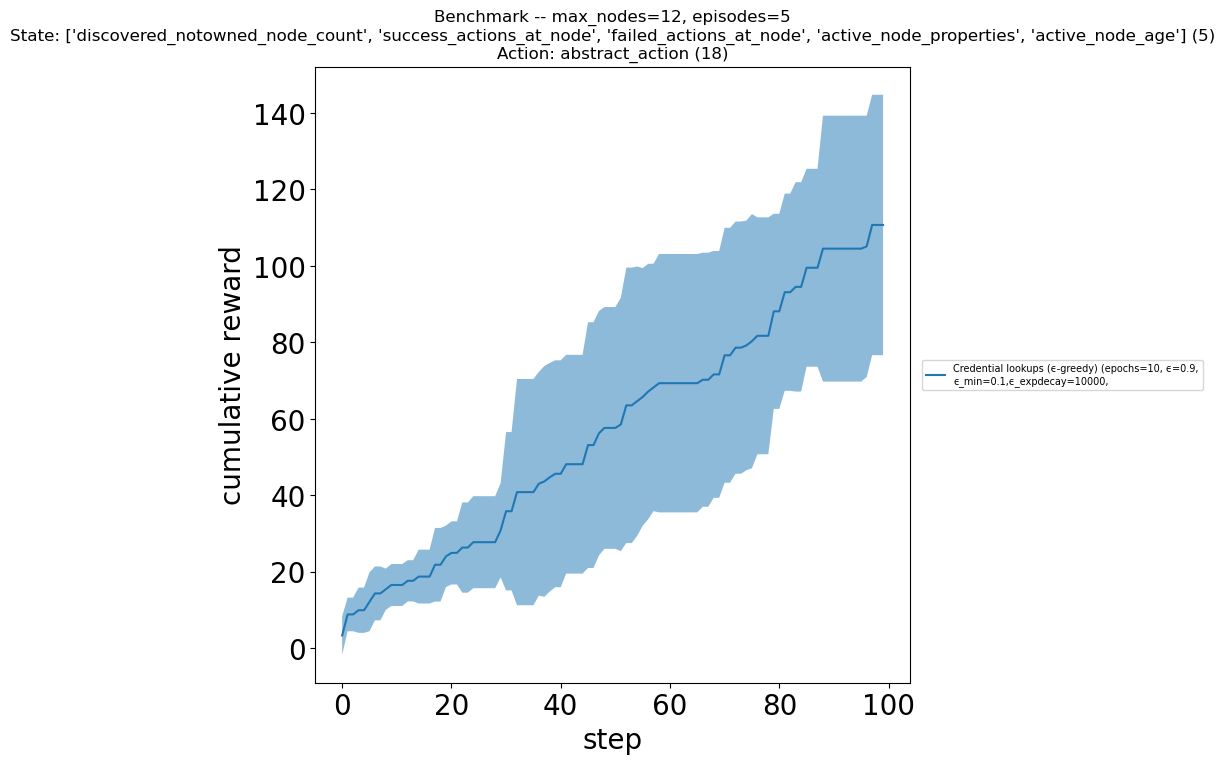

In [9]:
# Compare and plot results for all the agents
all_runs = [
    credlookup_run,
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=(
        f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count}\n"
        f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
        f"({len(themodel.state_space.feature_selection)})\n"
        f"Action: abstract_action ({themodel.action_space.flat_size()})"
    ),
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumrewards.png"),
)

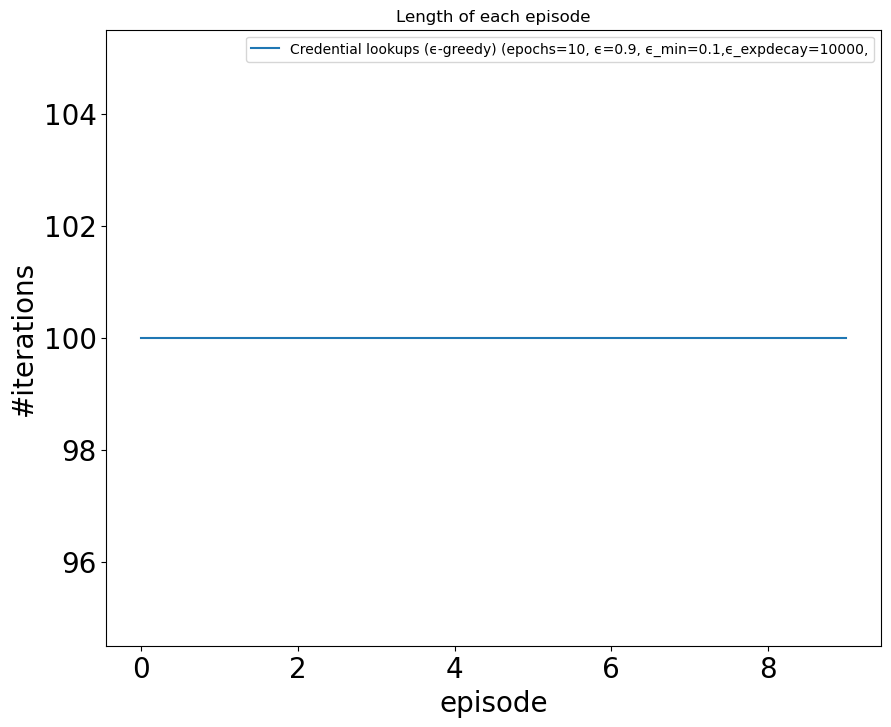

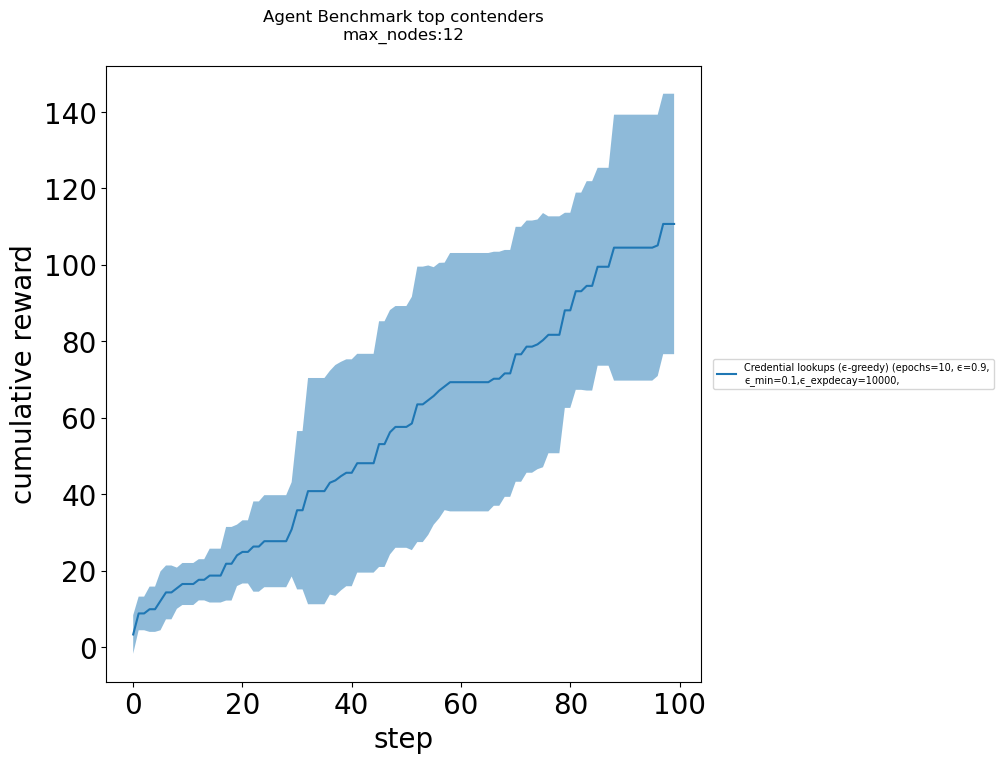

In [10]:
contenders = [credlookup_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f"Agent Benchmark top contenders\nmax_nodes:{ep.maximum_node_count}\n",
    all_runs=contenders,
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumreward_contenders.png"),
)

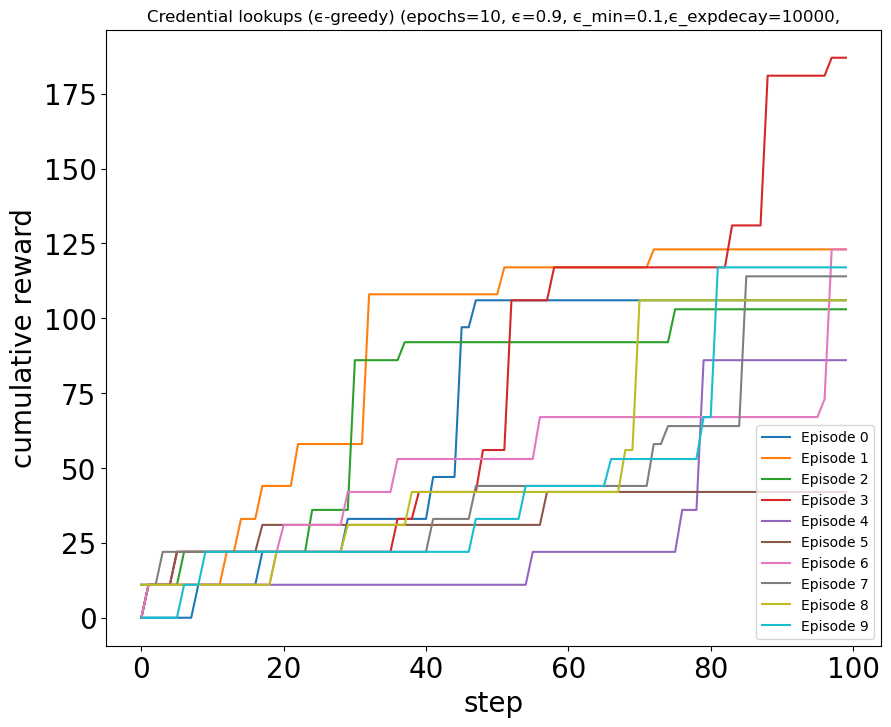

In [11]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)